<a href="https://colab.research.google.com/github/thecrazyphysicist369/Amnesic-Flooding/blob/main/Amnesic_Flooding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This is the code to test the consequences of Amnesic Flooding in a Wattz-Strogatz Small World Network.

A WS-Small world network is created with user input of:


*   **n** = *Number of individuals in the population. This is similar to the number of nodes in the small world network*.
*   **k** = *Number of nearest-neighbours. The number of nodes connected to each node in the small world network.*
*   **p** = *Probability of the length of connection between the nodes of the small world network.*


In [1]:
#Importing all the necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np
import time
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd

## Generating the Population


In [2]:
#vertex generator generates each individual with their properties
def gen_vertex(n,percent):
    ver_list=[]
    c=0

    for i in range(n):
      vertex = {
                'index': c, 			# the unique index of the voter
                'connected': [] ,  # the small world connections between the individuals
                'memory': [], 
                'generator' : random.randint(0,percent) ,
                'msg_sharability' : random.randint(0,10),
                'node_sharability' : 0,
                'mymsg':'0',
                'cur_msg':[]
                }
      ver_list.append(vertex)
      c+=1
    return ver_list

#Generating the Small World Network
def gen_graph(n, k, p,percent):
   population = gen_vertex(n,percent)
   G = nx.watts_strogatz_graph(n, k, p, seed=10)
   neighbor = []
   for node in list(sorted(G.nodes())):
   	neighbours = list(nx.all_neighbors(G, node))
   	neighbor.append(neighbours)
   for i in range(n):
     population[i]['connected'] = neighbor[i]
     population[i]['index'] = int(i)
     population[i]['node_sharability'] = random.randint(0,k)
   return population



##Creating the list of possible messages

In [3]:
 '''
this function generates and returns a list of msgs of strings. 

'''
def msgList():
  list1=[]
  for i in range(60,123) :
    for j in range(60,123) :
      p=chr(i)+chr(j)
      list1.append(p)
  return list1


## Generation of messages by few nodes

In [4]:
'''
this function randomly chooses from the list of msg and assigns it to one of the nodes that are generators 
'''
def  msgGeneration(population):
  list1=msgList()
  for i in population:
    if(i['generator']==1 ):
      l=random.randint(0,len(list1))
      i['mymsg']=list1[l]
      list1.pop(l)
  #print(len(list1))


#population



## Distribution of messages all over the graph

In [5]:
'''
This function is for passing the information.
It takes one vertex at a time
It checks if the vertex's neighbors has the same message as the vertex.
If it doesn't have, the vertex sends the message to the neighbor.
'''
def roundcalc_Unique_msg(population,k):
  nxt=[]
  cur=[]
  for node in population:
    if(node['generator']==1 ):
      #print(node['index'])
      nxt.append(node['index'])
      node['cur_msg'].append(node['mymsg'])
  
  
  round=0
  while(True):
    #print(nxt)
    if(len(nxt)==0):
      break
    cur=nxt
    nxt=[]
    
    round=round+1
    for el in cur:
      for adj in population[el]['connected']:
        flag=0
        for msg in population[el]['cur_msg']:
          msg=msg[:2]+str(el)
          #print(msg)
          if(msg in population[adj]['memory']):
            #print("pass"," ",msg," ",el," ",adj)
            continue
          if(len(population[adj]['memory'])>=k):
            flag=1
            population[adj]['memory'].pop(0)
            population[adj]['cur_msg'].append(msg)
            #print(el," ",adj," ",population[adj]['cur_msg']," memm---",population[adj]['memory'])
            population[adj]['memory'].append(msg)
          else:
            flag=1
            population[adj]['cur_msg'].append(msg)
            population[adj]['memory'].append(msg)
           # print("gyyygyg--- ",el," ",adj," ",population[adj]['cur_msg']," memm---",population[adj]['memory'])

        if(flag==1):
          if(adj not in nxt):
            nxt.append(adj)
      population[el]['cur_msg']=[]
      
      #print(round)
  print(round,end=" ")
  return round







In [ ]:
def user_input(no_nodes,no_of_connected_components,p,percent):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  m=0
  s=0
  for node in population:
    if(node['generator']==1):
      g=g+1
  msgGeneration(population)
  print(g)
  for k in range(g*(no_of_connected_components-1),g*(no_of_connected_components+2)):
    for node in population:
      node['cur_msg']=[]
      node['memory']=[]
    population1=population
    r=roundcalc_Unique_msg(population,k)
    x.append(k)
    y.append(r)
  x_train=np.array(x)
  y_train=np.array(y)
  print(g)
  plt.plot(x_train, y_train)
  plt.xlabel("memory_assigned_to_each_node")
  plt.ylabel("no_of_rounds")
  plt.show()
#population


In [ ]:
##User_input
def user_input(no_nodes,no_of_connected_components,p,percent,obs_no):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  for node in population:
    if(node['generator']==1):
      g=g+1
  msgGeneration(population)
  print(g)
  for k in range(g*(no_of_connected_components-1),g*(no_of_connected_components+3)):
    for node in population:
      node['cur_msg']=[]
      node['memory']=[]
    population1=population
    r=roundcalc_Unique_msg(population,k)
    x.append(k)
    y.append(r)
  x_train=np.array(x)
  y_train=np.array(y)
  print(g)
  plt.plot(x_train, y_train)
  plt.xlabel("memory_assigned_to_each_node")
  plt.ylabel("no_of_rounds")
  plt.show()
  no_connected=[]
  no_of_generators=[]
  dist_probability=[]
  for j in x_train:
    no_connected.append(no_of_connected_components)
    no_of_generators.append(g)
    dist_probability.append(p)
  frame=np.array([x_train,y_train,no_connected,no_of_generators,dist_probability])
  dataset=pd.DataFrame(frame)
  dataset=dataset.T
  dataset.columns=["memory_assigned_to_each_node","no_of_rounds","no_connected_components","no_of_generator","distance_prob"]
  dataset.to_csv("observation"+obs_no+".csv")
#population



26
17 17 17 18 17 16 16 16 17 18 18 19 18 17 16 16 18 16 16 17 17 13 15 14 14 13 10 10 11 12 11 10 11 11 11 10 11 10 10 10 10 10 12 11 11 11 10 11 11 11 11 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 7 7 7 7 7 7 7 8 8 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 26


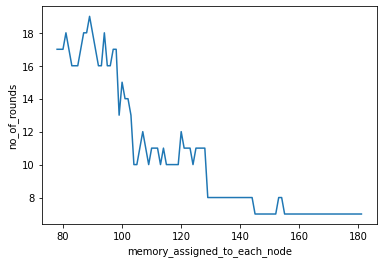

In [ ]:
user_input(250,4,0.5,9,"2")

12
13
12
13
13
13
12
14
13
13
14
12
12
10
11
9
11
13
10
9
9
10
9
8
10
10
10
10
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
12


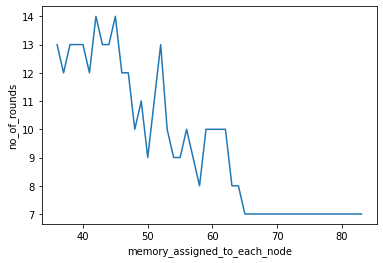

In [ ]:
user_input(100,4,0.9,9,"4")